# Mandatory assigment 1 Part A

### Exercice 1 Conditional frequency distributions

In [1]:
import nltk

from nltk.corpus import brown


Question a.

In [2]:
cfd = nltk.ConditionalFreqDist(
           (target, genre)
           for genre in ['news', 'religion', 
                    'government', 'fiction', 'romance'] 
           for w in brown.words(categories=genre)
           for target in ['he','she','her','him' ]
           if w.lower()==target)
cfd.tabulate()

       fiction government       news   religion    romance 
 he       1308        169        642        206       1068 
her        413          3        121          8        680 
him        382         26         93         94        340 
she        425          1         77         12        728 


Question b.

We can see that the male gender is more present than the female gender. Nevertheless, there are more 'her' than 'him' in the texts. We can also talk about the big difference between the number of 'he' and 'she' in the government category

Question c.

In [3]:
nominative = ['he', 'she']
objective  = ['him', 'her']
masculine  = ['he', 'him']
feminine   = ['she', 'her']

pronouns = ['he','she','her','him']

forms = []
for word in brown.words():
    if word in pronouns:
        if word in nominative:
            form = 'nominative'
        else:
            form = 'objective'
        if word in masculine:
            gender = 'masculine'
        else:
            gender = 'feminine'
        forms.append((form, gender))

In [4]:
forms_cfd = nltk.ConditionalFreqDist(forms)
forms_cfd.tabulate()

            feminine masculine 
nominative      1949      6566 
 objective      2885      2576 


In [5]:
import pandas as pd

pd.DataFrame(forms_cfd).transpose()/pd.DataFrame(forms_cfd).sum(axis=1)

,masculine,feminine
nominative,0.718224,0.403186
objective,0.281776,0.596814


Question d.

In [6]:
pronouns = ['he','she','her','him','hers','his']
wanted_tags = ['PN$', 'PP$', 'PPO','PP$$', 'PPS']
tag_words = [x for x in brown.tagged_words() 
             if (x[0] in pronouns and x[1] in wanted_tags)]

tag_words_cfd = nltk.ConditionalFreqDist(tag_words)

masculine  = ['he', 'him','his']
feminine   = ['she', 'her','hers']

pps_ppo = pd.DataFrame(tag_words_cfd)

pps_ppo.index = ['PPs', 'PPss', 'PPS', 'PPO']

grouped_pps_ppo = pd.concat([pps_ppo[masculine].sum(axis=1),pps_ppo[feminine].sum(axis=1)],  axis=1)
grouped_pps_ppo.columns = ['masculine', 'feminine']
grouped_pps_ppo

,masculine,feminine
PPs,6418.0,1775.0
PPss,36.0,16.0
PPS,6561.0,1946.0
PPO,2572.0,1106.0


In [7]:
grouped_pps_ppo/grouped_pps_ppo.sum(axis=0)

,masculine,feminine
PPs,0.411753,0.366508
PPss,0.002310,0.003304
PPS,0.420928,0.401817
PPO,0.165009,0.228371


We can now see the percentage has balanced between the feminine personal pronoun in nominative form and in objective form. For the masculine personal pronoun, we also see a balance between the nominative and objective form.

Question f.

<AxesSubplot:>

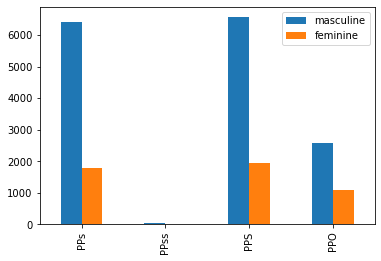

In [8]:
grouped_pps_ppo.plot.bar()

Question g.

This exercise has enabled us to understand several things. Firstly, about the use and occurrence of gender in the Brown Corpus texts, and secondly, about the subtleties to be taken into account when analysing a text. 
At the outset, we saw that male pronouns were used much more than female pronouns, especially in the government category. This can be explained by the discrimination of women throughout human history as well as the prejudices of society. 
We then saw that objective pronouns were more present in the female gender than in the male gender. 
In the rest of the exercise, we saw that we had to pay attention to the subtleties of the language in order to have a viable analysis since her is not only the feminine equivalent of him, but also of his.
Following a more detailed analysis of the occurrence of pronouns, we found a balance in the 2 genders, which seems more logical.
The Brown Corpus was first published in 1961. That was more than 60 years ago and the time was totally different. This may explain why the male gender is much more present than the female gender, knowing the context of the time and the differences between men and women.